In [50]:
import tensorflow as tf 
import os 
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
import cv2
from tensorflow.keras.models import load_model


In [8]:
data_dir = 'data' 
image_exts = ['jpeg','jpg', 'bmp', 'png']


In [10]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [12]:
data = tf.keras.utils.image_dataset_from_directory('data')


Found 305 files belonging to 2 classes.


In [13]:
data_iterator = data.as_numpy_iterator()


In [14]:
batch = data_iterator.next()


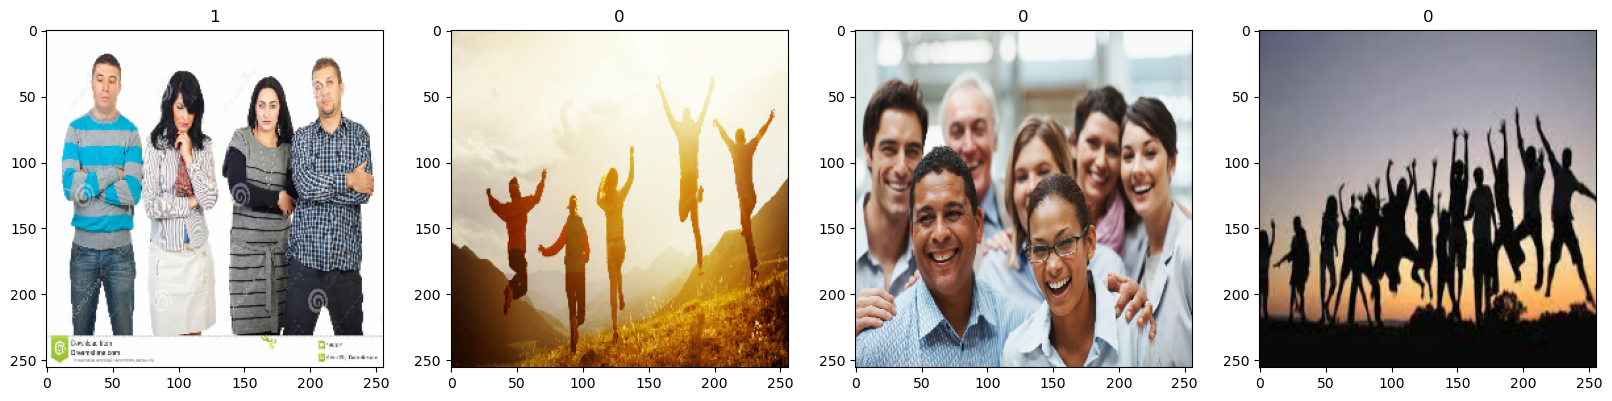

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [16]:
data = data.map(lambda x,y: (x/255, y))


In [17]:
data.as_numpy_iterator().next()


(array([[[[0.7921569 , 0.8392157 , 0.8392157 ],
          [0.79247856, 0.8395374 , 0.8395374 ],
          [0.7966146 , 0.8436734 , 0.8436734 ],
          ...,
          [0.37201285, 0.06613051, 0.05828738],
          [0.36534926, 0.06666667, 0.06602328],
          [0.3647059 , 0.06666667, 0.06666667]],
 
         [[0.75758666, 0.80239564, 0.8068954 ],
          [0.7629773 , 0.8098464 , 0.8102259 ],
          [0.77474844, 0.8198104 , 0.82380414],
          ...,
          [0.37201285, 0.06613051, 0.05828738],
          [0.36534926, 0.06666667, 0.06602328],
          [0.36695576, 0.06891653, 0.06891653]],
 
         [[0.739684  , 0.78289455, 0.7930048 ],
          [0.7458803 , 0.7914784 , 0.7946034 ],
          [0.7586953 , 0.80219907, 0.8114515 ],
          ...,
          [0.37325367, 0.06737132, 0.05952819],
          [0.36659008, 0.0690465 , 0.06498604],
          [0.36976102, 0.07296262, 0.0692402 ]],
 
         ...,
 
         [[0.6901961 , 0.49803922, 0.37254903],
          [0.69051

In [18]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)
train_size

7

In [19]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)


In [20]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [39]:
model = Sequential()


In [40]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [41]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 819ms/step - accuracy: 0.5754 - loss: 1.0133 - val_accuracy: 0.5469 - val_loss: 0.6798
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 796ms/step - accuracy: 0.5133 - loss: 0.6830 - val_accuracy: 0.5625 - val_loss: 0.6440
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 849ms/step - accuracy: 0.5437 - loss: 0.6619 - val_accuracy: 0.5781 - val_loss: 0.6064
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 780ms/step - accuracy: 0.6627 - loss: 0.5694 - val_accuracy: 0.8750 - val_loss: 0.4454
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 822ms/step - accuracy: 0.8301 - loss: 0.4570 - val_accuracy: 0.8438 - val_loss: 0.4585
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 963ms/step - accuracy: 0.8913 - loss: 0.3632 - val_accuracy: 0.7969 - val_loss: 0.3795
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 994ms/step - accuracy: 0.8577 - loss: 0.3540 - val_accuracy: 0.7969 - val_loss: 0.4693
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 918ms/step - accuracy: 0.8717 - loss: 0.2974 - val_accuracy: 0.8750 - val_loss

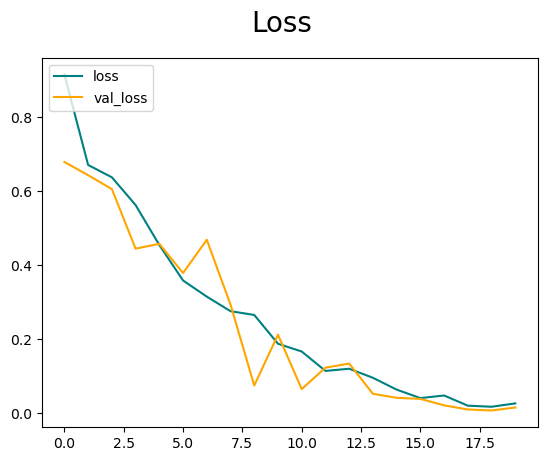

In [44]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

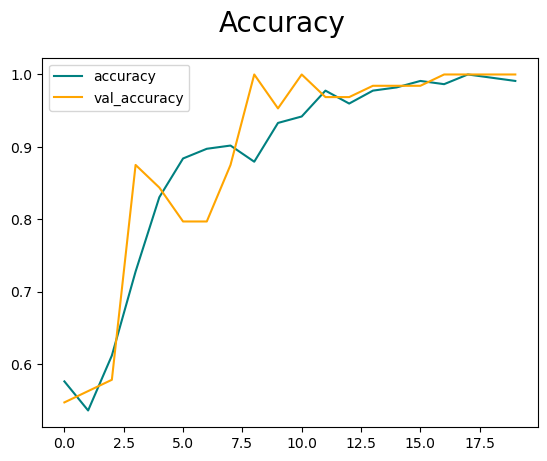

In [47]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [62]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
print(pre.result(), re.result(), acc.result())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


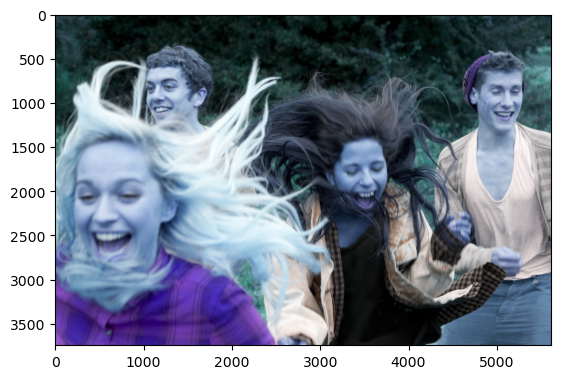

In [52]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

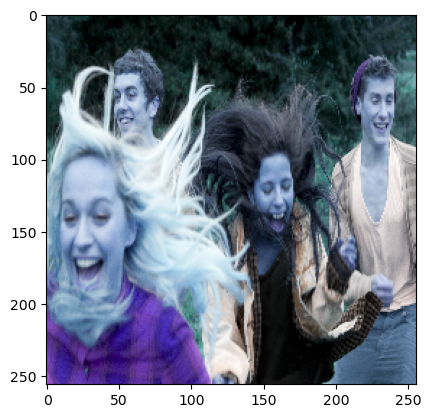

In [53]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [58]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[0.84034866]], dtype=float32)

In [66]:
if yhat[0] > 0.5: 
    print('Predicted class is Sad')
else:
    print('Predicted class is Happy')


Predicted class is Happy


In [72]:
if not os.path.exists('models'):
    os.makedirs('models')

model.save(os.path.join('models', 'imageclassifier.h5'))
